In [1]:
%load_ext autoreload
%autoreload 2

from spectroscopy_lib.interface import LinienHardwareInterface
from spectroscopy_lib.LaserLockController import LaserLockController

# SETUP CONFIG

Inside the spectroscopy_lib folder you will find a linien_connect_config.yaml file, you will need to update it with your data before running the next cell

In [2]:
RP_interface = LinienHardwareInterface()
RP_interface.set_debug_mode()

2025-10-14 15:24:54 - LinienHardwareInterface - INFO - Configuration loaded from /home/bec3/Desktop/Simone_Damian/Serafini/spectroscopy_lib/linien_connect_config.yaml:

2025-10-14 15:24:54 - LinienHardwareInterface - INFO - Attempting connection via local_host address (192.168.1.159:18862)


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       ERROR    Server is not running. Launching it!


Connecting to Linien server...
2.1.0


linien_client.deploy           DEBUG    Local version: 2.1.0, Remote version: 2.1.0
linien_client.deploy           DEBUG    Sending credentials
linien_client.deploy           DEBUG    Starting server


linien_server.cli              DEBUG    Copied linien-server.service to /etc/systemd/system
linien_server.cli              INFO     Starting Linien server
linien_server.cli              INFO     Started Linien server


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still

2025-10-14 15:25:27 - LinienHardwareInterface - INFO - Connected to device via local_host address


Once successfully connected to RP you will feed the hardware interface you just created to the LaserLockController
However, you first need to change the initialization parameters of the server in linien_params_config.yaml according to you exp setup.

In [5]:
RP_interface.start_sweep()

In [3]:
RP_controller = LaserLockController(RP_interface)

2025-10-14 15:25:45 - LinienDataHandler - INFO - All reference lines loaded successfully.
2025-10-14 15:25:45 - LaserLockController - INFO - LaserLockController initialized successfully.


You will now perform a scan of the entire available range through the big offset, ie the wide range analog out, and will see the resulting signal.

2025-10-14 15:26:57 - LaserLockController - INFO - Starting scan from 0.93V to 0.96V with 4 points.


Scanning at voltage 0.960V (4/4) [##########] (6.66s) Done!
2025-10-14 15:27:04 - LaserLockController - INFO - Scan completed successfully.


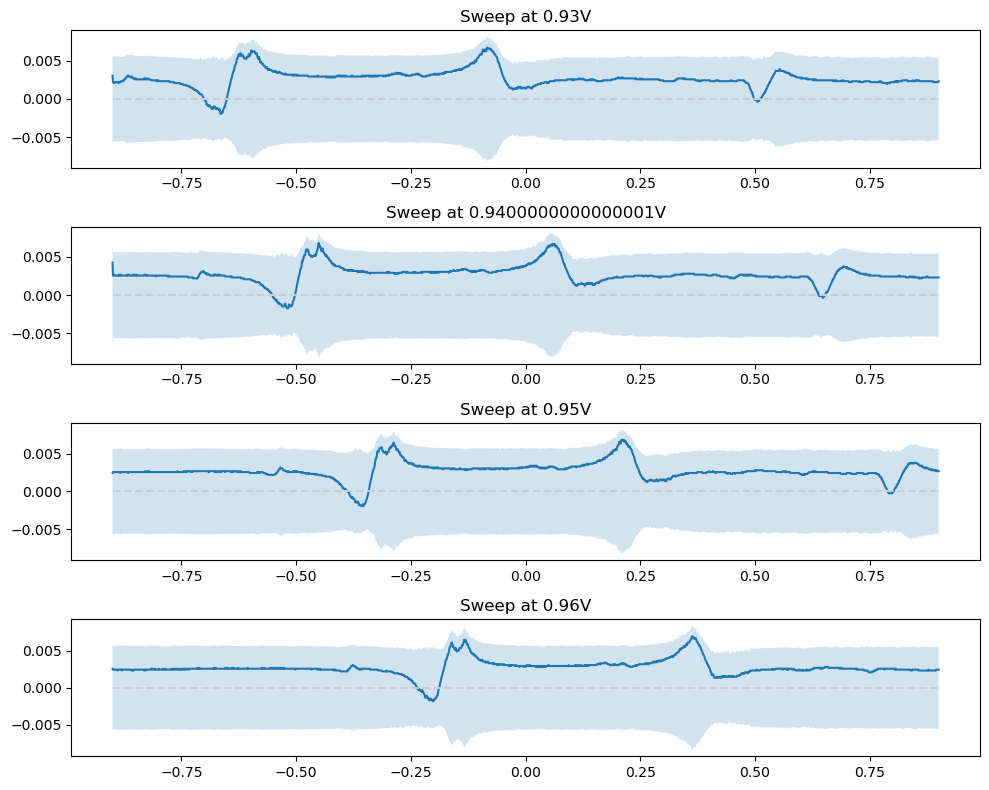

In [6]:
RP_controller.hardware_interface.unset_debug_mode()
RP_controller.scan_lines(start_voltage= 0.93, stop_voltage= 0.96, num_points= 4)

You now need to identify at which V_scan the three features of you spectra have appeared, and save them to three distinct reference files.
Set False to True if want to save new reference lines.
- key gives a label to the reference line
- V_scan is the value of the offset voltage corresponding to the sweep where you have found the reference line
- [start_voltage,stop_voltage] is the region where you want to save the reference line(ie cut out where the sweep is simply flat)
- [V_lock_start,V_lock_end] is the region of the lock (ie before the minimum and after the maximum of the locking line)

In [50]:
RP_interface._basic_configure()

2025-10-14 15:57:46 - LaserLockController - INFO - Saving reference line with key feature_1.


2025-10-14 15:57:46 - LinienDataHandler - INFO - Saved reference line: REFERENCE_LINE_feature_1.npy
2025-10-14 15:57:46 - LinienDataHandler - INFO - All reference lines loaded successfully.


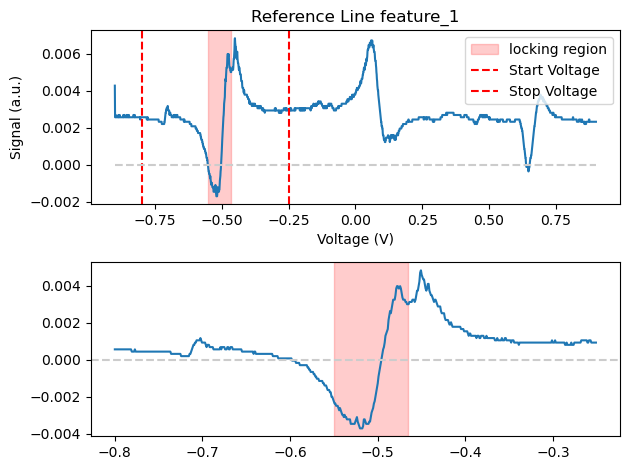

2025-10-14 15:57:46 - LaserLockController - INFO - Reference line feature_1 saved successfully.


In [41]:
if True:
    #RP_controller.reset_reference_lines()
    # replace the key and V_scan with the appropriate values for your features
    RP_controller.save_reference_line(key = 'feature_1', V_scan = 0.94, start_voltage=-0.8, stop_voltage=-0.25, V_lock_start = -0.55, V_lock_end = -0.465,offset=-0.002)

In [ ]:
RP_controller.data_handler.plot_reference_line_plus_offset(key = 'feature_1', offset = 0.003)

2025-10-14 15:41:01 - LinienDataHandler - ERROR - Reference line with key feature_1 doesn't exists.


We will now make the software identify where the reference lines are, in practice it will scan again the frequency but this time it will try to recognize the presence of the reference lines just saved.

2025-10-14 16:17:05 - LaserLockController - INFO - Finding reference lines.
2025-10-14 16:17:05 - LaserLockController - DEBUG - Setting voltage to 0.9V
2025-10-14 16:17:07 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
2025-10-14 16:17:07 - LaserLockController - DEBUG - Correlation with LINE_feature_1 at 0.9V: 0.9909083411295788, Length of match: 0.5469467513434673, offset with respect to the reference signal: 0.0020257870571493905
2025-10-14 16:17:07 - LaserLockController - DEBUG - Setting voltage to 0.92V
2025-10-14 16:17:08 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
2025-10-14 16:17:08 - LaserLockController - DEBUG - Correlation with LINE_feature_1 at 0.92V: 0.8739031209427794, Length of match: 0.5469467513434674, offset with respect to the reference signal: 0.0021422380044204947
2025-10-14 16:17:08 - LaserLockController - DEBUG - Setting voltage to 0.9400000000000001V
2025-10-14 16:17:10 - LinienHardwareInterface - DEBUG - Sweep s

AttributeError: 'ParameterImplementationWriteable' object has no attribute 'get_remote_value'

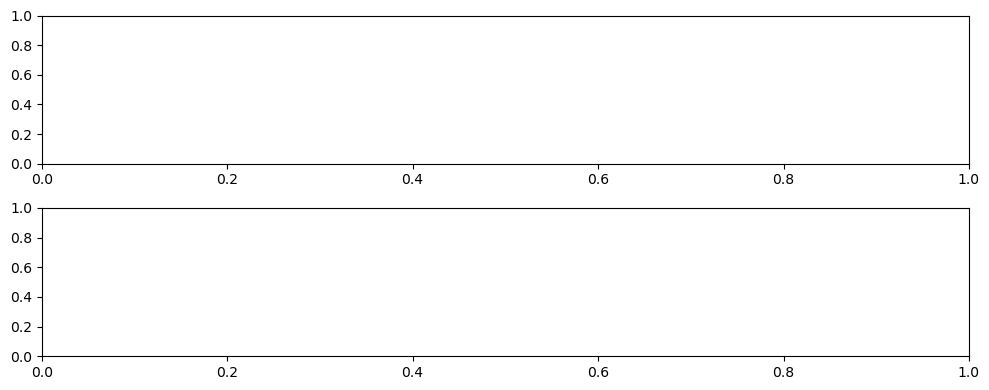

In [48]:
RP_controller.set_debug_mode()
RP_controller.find_reference_lines(start_voltage= 0.9, stop_voltage= 1., num_points= 6)

We will now try to center a specific line. To do this you will need to choose a key which is the one corresponding to the line you saved

2025-10-14 10:08:07 - LaserLockController - INFO - Line LINE_feature_1 is centered at offset 0.9705263157894737.


ValueError: attempt to get argmin of an empty sequence

========= Remote Traceback (1) =========
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rpyc/core/protocol.py", line 369, in _dispatch_request
    res = self._HANDLERS[handler](self, *args)
  File "/usr/local/lib/python3.10/dist-packages/rpyc/core/protocol.py", line 863, in _handle_call
    return obj(*args, **dict(kwargs))
  File "/usr/local/lib/python3.10/dist-packages/linien_server/server.py", line 270, in exposed_start_autolock
    autolock.run(
  File "/usr/local/lib/python3.10/dist-packages/linien_server/autolock/autolock.py", line 98, in run
    ) = self.record_first_error_signal(spectrum, auto_offset)
  File "/usr/local/lib/python3.10/dist-packages/linien_server/autolock/autolock.py", line 229, in record_first_error_signal
    ) = get_lock_point(error_signal, self.x0, self.x1)
  File "/usr/local/lib/python3.10/dist-packages/linien_common/common.py", line 229, in get_lock_point
    min_idx = np.argmin(cropped_data)
  File "<__array_function__ internals>", line 5, in argmin
  File "/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py", line 1276, in argmin
    return _wrapfunc(a, 'argmin', axis=axis, out=out)
  File "/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return bound(*args, **kwds)
ValueError: attempt to get argmin of an empty sequence


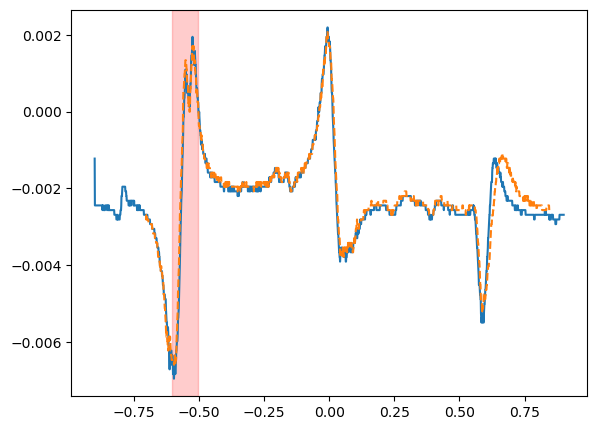

In [40]:

line_key = 'LINE_feature_1'  # replace with the LINE_key of the line you want to center
print(RP_controller.lines_positions)
RP_controller.center_and_lock_v1(line_key)